# YourCabs - Model Training & Evaluation (Clean Pipeline)

**Objective**: Train XGBoost model using cleaned data from EDA analysis to achieve 85%+ AUC performance.

## 🧹 **Clean Project Structure**:
- ✅ **EDA Notebook** (`eda.ipynb`): Complete data analysis + cleaning pipeline
- ✅ **Model Training** (`model_training_clean.ipynb`): This notebook - optimized training
- ✅ **Cleaned Data** (`YourCabs_cleaned.csv`): Pre-processed dataset ready for modeling
- ✅ **Production Scripts**: Standalone Python files for deployment

## 🎯 **Key Features**:
- Uses pre-cleaned data from EDA analysis
- XGBoost with natural class imbalance handling (NO SMOTE)
- Comprehensive 5-algorithm comparison 
- Hyperparameter optimization for best performance
- Production-ready model export

## 📦 Import Libraries

In [1]:
# 📁 PROJECT STRUCTURE OVERVIEW
import os

print("🏗️ CLEAN PROJECT STRUCTURE")
print("=" * 60)

def show_tree(path, prefix="", max_files=5):
    """Display clean directory tree"""
    if not os.path.exists(path):
        return
    
    items = sorted(os.listdir(path))
    dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
    files = [item for item in items if os.path.isfile(os.path.join(path, item))]
    
    # Show directories first
    for i, dir_name in enumerate(dirs):
        if i == len(dirs) - 1 and not files:
            print(f"{prefix}└── {dir_name}/")
            new_prefix = prefix + "    "
        else:
            print(f"{prefix}├── {dir_name}/")
            new_prefix = prefix + "│   "
        
        # Recursively show subdirectory contents
        show_tree(os.path.join(path, dir_name), new_prefix, max_files)
    
    # Show files
    displayed_files = files[:max_files]
    for i, file_name in enumerate(displayed_files):
        if i == len(displayed_files) - 1 and len(files) <= max_files:
            print(f"{prefix}└── {file_name}")
        else:
            print(f"{prefix}├── {file_name}")
    
    if len(files) > max_files:
        print(f"{prefix}└── ... and {len(files) - max_files} more files")

# Show project structure
project_root = ".."
print("ur cabs/")
show_tree(project_root)

print(f"\n✅ PROJECT CLEANUP COMPLETED:")
print(f"   • Removed duplicate notebooks")
print(f"   • Removed cache directories") 
print(f"   • Clean separation: EDA → Model Training → Production")
print(f"   • Using cleaned data pipeline")

print(f"\n🎯 CURRENT WORKFLOW:")
print(f"   1. EDA Analysis (eda.ipynb) ✅ COMPLETED")
print(f"   2. Data Cleaning ✅ COMPLETED") 
print(f"   3. Model Training (this notebook) 🔄 IN PROGRESS")
print(f"   4. Production Deployment 📋 READY")

🏗️ CLEAN PROJECT STRUCTURE
ur cabs/
├── data/
│   ├── YourCabs_cleaned.csv
│   ├── YourCabs_score.csv
│   ├── YourCabs_training.csv
│   └── cleaning_report.json
├── models/
│   ├── best_model.joblib
│   └── model_info.json
├── notebooks/
│   ├── eda.ipynb
│   └── model_training_clean.ipynb
├── src/
├── requirements.txt
├── run_training.bat
├── score_only.py
└── train_clean.py

✅ PROJECT CLEANUP COMPLETED:
   • Removed duplicate notebooks
   • Removed cache directories
   • Clean separation: EDA → Model Training → Production
   • Using cleaned data pipeline

🎯 CURRENT WORKFLOW:
   1. EDA Analysis (eda.ipynb) ✅ COMPLETED
   2. Data Cleaning ✅ COMPLETED
   3. Model Training (this notebook) 🔄 IN PROGRESS
   4. Production Deployment 📋 READY


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Multiple ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model persistence
import joblib
import json
import os
import time

print("📦 All libraries imported successfully!")
print("🚀 Ready for comprehensive model comparison!")
print("🎯 Models to compare: Linear Regression, Logistic Regression, Decision Tree, Random Forest, XGBoost")

📦 All libraries imported successfully!
🚀 Ready for comprehensive model comparison!
🎯 Models to compare: Linear Regression, Logistic Regression, Decision Tree, Random Forest, XGBoost


## 📊 Load and Prepare Data

In [4]:
# Load the cleaned training data from EDA
try:
    # First try to load cleaned data
    df = pd.read_csv('../data/YourCabs_cleaned.csv')
    print("🎯 MODEL TRAINING - USING CLEANED DATA FROM EDA")
    print("=" * 60)
    print("✅ Loaded pre-cleaned dataset from EDA analysis")
    data_source = "cleaned"
except FileNotFoundError:
    # Fallback to original data if cleaned data not found
    df = pd.read_csv('../data/YourCabs_training.csv')
    print("🎯 MODEL TRAINING - USING ORIGINAL DATA")
    print("=" * 60)
    print("⚠️ Cleaned data not found, using original dataset")
    data_source = "original"

print(f"📊 Dataset Shape: {df.shape}")
print(f"🎯 Target column: {'Car_Cancellation' if 'Car_Cancellation' in df.columns else 'NOT FOUND'}")

if 'Car_Cancellation' in df.columns:
    target_dist = df['Car_Cancellation'].value_counts()
    print(f"Target distribution: {target_dist.to_dict()}")
    print(f"Cancellation rate: {df['Car_Cancellation'].mean():.1%}")
    
    # Show data quality info
    missing_values = df.isnull().sum().sum()
    print(f"📊 Data Quality: {missing_values:,} missing values")
    
    if data_source == "cleaned":
        print("✅ Using pre-processed data with:")
        print("   • Missing values handled")
        print("   • Outliers managed")
        print("   • New features engineered")
        print("   • Class imbalance ready for XGBoost scale_pos_weight")
else:
    print("❌ Target column not found!")

# Check for new features from cleaning
if data_source == "cleaned":
    new_features = [col for col in df.columns if col.startswith(('is_', 'booking_'))]
    if new_features:
        print(f"\n🆕 NEW FEATURES FROM EDA: {new_features}")

df.head()

🎯 MODEL TRAINING - USING CLEANED DATA FROM EDA
✅ Loaded pre-cleaned dataset from EDA analysis
📊 Dataset Shape: (43431, 24)
🎯 Target column: Car_Cancellation
Target distribution: {0: 40299, 1: 3132}
Cancellation rate: 7.2%
📊 Data Quality: 17,890 missing values
✅ Using pre-processed data with:
   • Missing values handled
   • Outliers managed
   • New features engineered
   • Class imbalance ready for XGBoost scale_pos_weight

🆕 NEW FEATURES FROM EDA: ['booking_created', 'is_round_trip', 'booking_created_dt', 'booking_hour', 'booking_day_of_week', 'booking_month', 'booking_channel']


,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_city_id,from_date,to_date,online_booking,...,to_lat,to_long,Car_Cancellation,Cost_of_error,is_round_trip,booking_created_dt,booking_hour,booking_day_of_week,booking_month,booking_channel
0,132512,22177,28,2,83.0,448.0,15.0,1/1/2013 2:00,NaN,0,...,12.927320,77.635750,0,1.0,0,2013-01-01 01:39:00,1,1,1,other
1,132513,21413,12,2,1010.0,540.0,15.0,1/1/2013 9:00,NaN,0,...,12.927680,77.626640,0,1.0,0,2013-01-01 02:25:00,2,1,1,other
2,132514,22178,12,2,1301.0,1034.0,15.0,1/1/2013 3:30,NaN,0,...,13.047926,77.597766,0,1.0,0,2013-01-01 03:08:00,3,1,1,other
3,132515,13034,12,2,768.0,398.0,15.0,1/1/2013 5:45,NaN,0,...,12.971430,77.639140,0,1.0,0,2013-01-01 04:39:00,4,1,1,other
4,132517,22180,12,2,1365.0,849.0,15.0,1/1/2013 9:00,NaN,0,...,12.954340,77.600720,0,1.0,0,2013-01-01 07:53:00,7,1,1,other


## 🔧 Feature Engineering

In [5]:
# Feature Engineering - Optimized for cleaned data
print("🔧 FEATURE ENGINEERING")
print("=" * 50)

# Create a copy for processing
df_processed = df.copy()

if data_source == "cleaned":
    print("✅ Using pre-cleaned data - minimal additional processing needed")
    
    # Data is already cleaned, just verify key features exist
    existing_features = []
    if 'is_round_trip' in df_processed.columns:
        existing_features.append('is_round_trip (from EDA)')
    if 'booking_hour' in df_processed.columns:
        existing_features.append('booking_hour (from EDA)')
    if 'booking_day_of_week' in df_processed.columns:
        existing_features.append('booking_day_of_week (from EDA)')
    if 'booking_channel' in df_processed.columns:
        existing_features.append('booking_channel (from EDA)')
    
    if existing_features:
        print(f"🎯 Pre-engineered features found: {existing_features}")
    
    # Convert categorical booking_channel to dummies if it exists
    if 'booking_channel' in df_processed.columns:
        channel_dummies = pd.get_dummies(df_processed['booking_channel'], prefix='channel')
        df_processed = pd.concat([df_processed, channel_dummies], axis=1)
        print("✅ Created booking channel dummy variables")
    
else:
    print("⚠️ Using original data - applying full feature engineering")
    
    # Apply feature engineering for original data
    print(f"Missing values before cleaning: {df_processed.isnull().sum().sum()}")
    
    # Handle missing values quickly for modeling
    for col in df_processed.select_dtypes(include=[np.number]).columns:
        if df_processed[col].isnull().sum() > 0:
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())
    
    # Time-based features
    if 'booking_created' in df_processed.columns:
        df_processed['booking_created'] = pd.to_datetime(df_processed['booking_created'], errors='coerce')
        df_processed['booking_hour'] = df_processed['booking_created'].dt.hour
        df_processed['booking_day_of_week'] = df_processed['booking_created'].dt.dayofweek
        df_processed['is_weekend'] = (df_processed['booking_day_of_week'] >= 5).astype(int)
        print("✅ Created time-based features")

    # Travel type features
    if 'travel_type_id' in df_processed.columns:
        df_processed['is_business_travel'] = (df_processed['travel_type_id'] == 1).astype(int)
        df_processed['is_leisure_travel'] = (df_processed['travel_type_id'] == 2).astype(int)
        print("✅ Created travel type features")

    # Late booking feature
    if 'booking_hour' in df_processed.columns:
        df_processed['is_late_booking'] = ((df_processed['booking_hour'] <= 6) | 
                                          (df_processed['booking_hour'] >= 22)).astype(int)
        print("✅ Created late booking feature")

# Final feature count
print(f"\n📊 Final dataset shape: {df_processed.shape}")
print(f"✅ Feature engineering complete!")

# Show remaining missing values
final_missing = df_processed.isnull().sum().sum()
if final_missing > 0:
    print(f"⚠️ Remaining missing values: {final_missing:,}")
else:
    print("✅ No missing values remaining")

🔧 FEATURE ENGINEERING
✅ Using pre-cleaned data - minimal additional processing needed
🎯 Pre-engineered features found: ['is_round_trip (from EDA)', 'booking_hour (from EDA)', 'booking_day_of_week (from EDA)', 'booking_channel (from EDA)']
✅ Created booking channel dummy variables

📊 Final dataset shape: (43431, 27)
✅ Feature engineering complete!
⚠️ Remaining missing values: 17,890


## 📋 Feature Selection

In [6]:
# Smart feature selection based on cleaned data
print("📋 FEATURE SELECTION")
print("=" * 50)

# Define core features that should always be included if available
core_features = [
    'online_booking', 'mobile_site_booking', 
    'vehicle_model_id', 'travel_type_id',
    'from_area_id', 'to_area_id'
]

# Define engineered features (from EDA or current processing)
engineered_features = [
    'booking_hour', 'booking_day_of_week', 'booking_month',
    'is_weekend', 'is_late_booking', 'is_round_trip',
    'is_business_travel', 'is_leisure_travel',
    'channel_mobile', 'channel_online', 'channel_other'
]

# Define geographic features
geo_features = [
    'from_lat', 'from_long', 'to_lat', 'to_long',
    'from_city_id'  # Exclude to_city_id as it was dropped in cleaning
]

# Combine all potential features
all_potential_features = core_features + engineered_features + geo_features

# Select only features that exist in the dataset and are not the target
available_features = []
for col in all_potential_features:
    if col in df_processed.columns and col != 'Car_Cancellation':
        available_features.append(col)

print(f"Potential features: {len(all_potential_features)}")
print(f"Available features: {len(available_features)}")
print(f"Selected features: {available_features}")

# Verify no missing target
if 'Car_Cancellation' not in df_processed.columns:
    print("\n❌ Car_Cancellation column not found!")
    X, y = None, None
else:
    # Create feature matrix
    X = df_processed[available_features].copy()
    y = df_processed['Car_Cancellation'].copy()
    
    # Handle any remaining missing values in features
    if X.isnull().sum().sum() > 0:
        print(f"\n⚠️ Handling {X.isnull().sum().sum()} remaining missing values in features...")
        # For numerical columns, use median imputation
        for col in X.select_dtypes(include=[np.number]).columns:
            if X[col].isnull().sum() > 0:
                X[col] = X[col].fillna(X[col].median())
        
        # For categorical columns, use mode imputation
        for col in X.select_dtypes(include=['object']).columns:
            if X[col].isnull().sum() > 0:
                X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'unknown')
    
    print(f"\n✅ Feature matrix created: {X.shape}")
    print(f"Target distribution: {y.value_counts().to_dict()}")
    
    # Feature importance preview (show data types)
    print(f"\n📊 FEATURE SUMMARY:")
    for col in available_features[:10]:  # Show first 10 features
        dtype = X[col].dtype
        unique_vals = X[col].nunique()
        print(f"   • {col}: {dtype} ({unique_vals} unique values)")
    
    if len(available_features) > 10:
        print(f"   ... and {len(available_features) - 10} more features")

print("="*50)

📋 FEATURE SELECTION
Potential features: 22
Available features: 18
Selected features: ['online_booking', 'mobile_site_booking', 'vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id', 'booking_hour', 'booking_day_of_week', 'booking_month', 'is_round_trip', 'channel_mobile', 'channel_online', 'channel_other', 'from_lat', 'from_long', 'to_lat', 'to_long', 'from_city_id']

✅ Feature matrix created: (43431, 18)
Target distribution: {0: 40299, 1: 3132}

📊 FEATURE SUMMARY:
   • online_booking: int64 (2 unique values)
   • mobile_site_booking: int64 (2 unique values)
   • vehicle_model_id: int64 (27 unique values)
   • travel_type_id: int64 (3 unique values)
   • from_area_id: float64 (598 unique values)
   • to_area_id: float64 (568 unique values)
   • booking_hour: int64 (24 unique values)
   • booking_day_of_week: int64 (7 unique values)
   • booking_month: int64 (11 unique values)
   • is_round_trip: int64 (2 unique values)
   ... and 8 more features


## 🔀 Train-Test Split

In [7]:
# Train-test split with stratification
if X is not None and y is not None:
    print("🔀 TRAIN-TEST SPLIT")
    print("=" * 50)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]:,} samples")
    print(f"Test set: {X_test.shape[0]:,} samples")
    print(f"Training target distribution: {y_train.value_counts().to_dict()}")
    print(f"Test target distribution: {y_test.value_counts().to_dict()}")
    
    # Calculate class weights for XGBoost
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    print(f"\n⚖️ Scale pos weight: {scale_pos_weight:.2f}")
    print("(This will handle class imbalance naturally - NO SMOTE needed!)")
else:
    print("❌ Cannot proceed without proper features and target")

🔀 TRAIN-TEST SPLIT
Training set: 34,744 samples
Test set: 8,687 samples
Training target distribution: {0: 32238, 1: 2506}
Test target distribution: {0: 8061, 1: 626}

⚖️ Scale pos weight: 12.86
(This will handle class imbalance naturally - NO SMOTE needed!)


## 🔬 Model Comparison Framework

Let's compare multiple algorithms to demonstrate why XGBoost is the best choice for this dataset.

In [8]:
# Initialize models for comparison
if 'X_train' in locals():
    print("🔬 COMPREHENSIVE MODEL COMPARISON")
    print("=" * 60)
    
    # Prepare data scaling for algorithms that need it
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models dictionary
    models = {
        'Linear Regression': LinearRegression(),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            eval_metric='auc'
        )
    }
    
    # Results storage
    results = {
        'Model': [],
        'Training_Time': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1_Score': [],
        'ROC_AUC': [],
        'Notes': []
    }
    
    print(f"✅ {len(models)} models initialized for comparison")
    print(f"📊 Dataset: {X_train.shape[0]:,} training samples, {X_test.shape[0]:,} test samples")
    print(f"⚖️ Class imbalance ratio: {scale_pos_weight:.2f}:1")
    
else:
    print("❌ Cannot proceed without proper train-test split")

🔬 COMPREHENSIVE MODEL COMPARISON
✅ 5 models initialized for comparison
📊 Dataset: 34,744 training samples, 8,687 test samples
⚖️ Class imbalance ratio: 12.86:1


In [9]:
# Train and evaluate each model
if 'models' in locals():
    print("🚀 TRAINING ALL MODELS")
    print("=" * 60)
    
    for model_name, model in models.items():
        print(f"\n🔧 Training {model_name}...")
        start_time = time.time()
        
        try:
            # Choose appropriate data based on model type
            if model_name in ['Logistic Regression']:
                # Use scaled data for models sensitive to feature scale
                X_train_use = X_train_scaled
                X_test_use = X_test_scaled
            else:
                # Use original data for tree-based models
                X_train_use = X_train
                X_test_use = X_test
            
            # Special handling for Linear Regression (regression model)
            if model_name == 'Linear Regression':
                # Train model
                model.fit(X_train_use, y_train)
                training_time = time.time() - start_time
                
                # Get predictions (convert probabilities to binary)
                y_pred_prob = model.predict(X_test_use)
                y_pred = (y_pred_prob > 0.5).astype(int)  # Simple threshold
                
                # Calculate metrics (with adjustments for regression)
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, zero_division=0)
                recall = recall_score(y_test, y_pred, zero_division=0)
                f1 = f1_score(y_test, y_pred, zero_division=0)
                
                # For AUC, use predicted values as probabilities
                try:
                    roc_auc = roc_auc_score(y_test, y_pred_prob)
                except:
                    roc_auc = 0.5  # Default for failed AUC calculation
                
                notes = "Regression model adapted for classification"
                
            else:
                # Classification models
                model.fit(X_train_use, y_train)
                training_time = time.time() - start_time
                
                # Get predictions
                y_pred = model.predict(X_test_use)
                y_pred_prob = model.predict_proba(X_test_use)[:, 1] if hasattr(model, 'predict_proba') else y_pred
                
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, zero_division=0)
                recall = recall_score(y_test, y_pred, zero_division=0)
                f1 = f1_score(y_test, y_pred, zero_division=0)
                roc_auc = roc_auc_score(y_test, y_pred_prob)
                
                notes = "Standard classification"
            
            # Store results
            results['Model'].append(model_name)
            results['Training_Time'].append(f"{training_time:.3f}s")
            results['Accuracy'].append(f"{accuracy:.3f}")
            results['Precision'].append(f"{precision:.3f}")
            results['Recall'].append(f"{recall:.3f}")
            results['F1_Score'].append(f"{f1:.3f}")
            results['ROC_AUC'].append(f"{roc_auc:.3f}")
            results['Notes'].append(notes)
            
            print(f"   ✅ Completed in {training_time:.3f}s | AUC: {roc_auc:.3f}")
            
        except Exception as e:
            print(f"   ❌ Failed: {str(e)}")
            # Add failed results
            results['Model'].append(model_name)
            results['Training_Time'].append("Failed")
            results['Accuracy'].append("N/A")
            results['Precision'].append("N/A")
            results['Recall'].append("N/A")
            results['F1_Score'].append("N/A")
            results['ROC_AUC'].append("N/A")
            results['Notes'].append(f"Error: {str(e)[:50]}...")
    
    print(f"\n✅ Model training completed!")
    
else:
    print("❌ Models not initialized")

🚀 TRAINING ALL MODELS

🔧 Training Linear Regression...
   ✅ Completed in 0.043s | AUC: 0.813

🔧 Training Logistic Regression...
   ✅ Completed in 0.025s | AUC: 0.817

🔧 Training Decision Tree...
   ✅ Completed in 0.274s | AUC: 0.634

🔧 Training Random Forest...
   ✅ Completed in 4.638s | AUC: 0.855

🔧 Training XGBoost...
   ✅ Completed in 0.372s | AUC: 0.874

✅ Model training completed!


📊 COMPREHENSIVE MODEL COMPARISON RESULTS
              Model Training_Time Accuracy Precision Recall F1_Score ROC_AUC                                       Notes
  Linear Regression        0.043s    0.928     0.000  0.000    0.000   0.813 Regression model adapted for classification
Logistic Regression        0.025s    0.928     0.562  0.029    0.055   0.817                     Standard classification
      Decision Tree        0.274s    0.901     0.317  0.318    0.317   0.634                     Standard classification
      Random Forest        4.638s    0.932     0.603  0.145    0.234   0.855                     Standard classification
            XGBoost        0.372s    0.870     0.311  0.665    0.424   0.874                     Standard classification


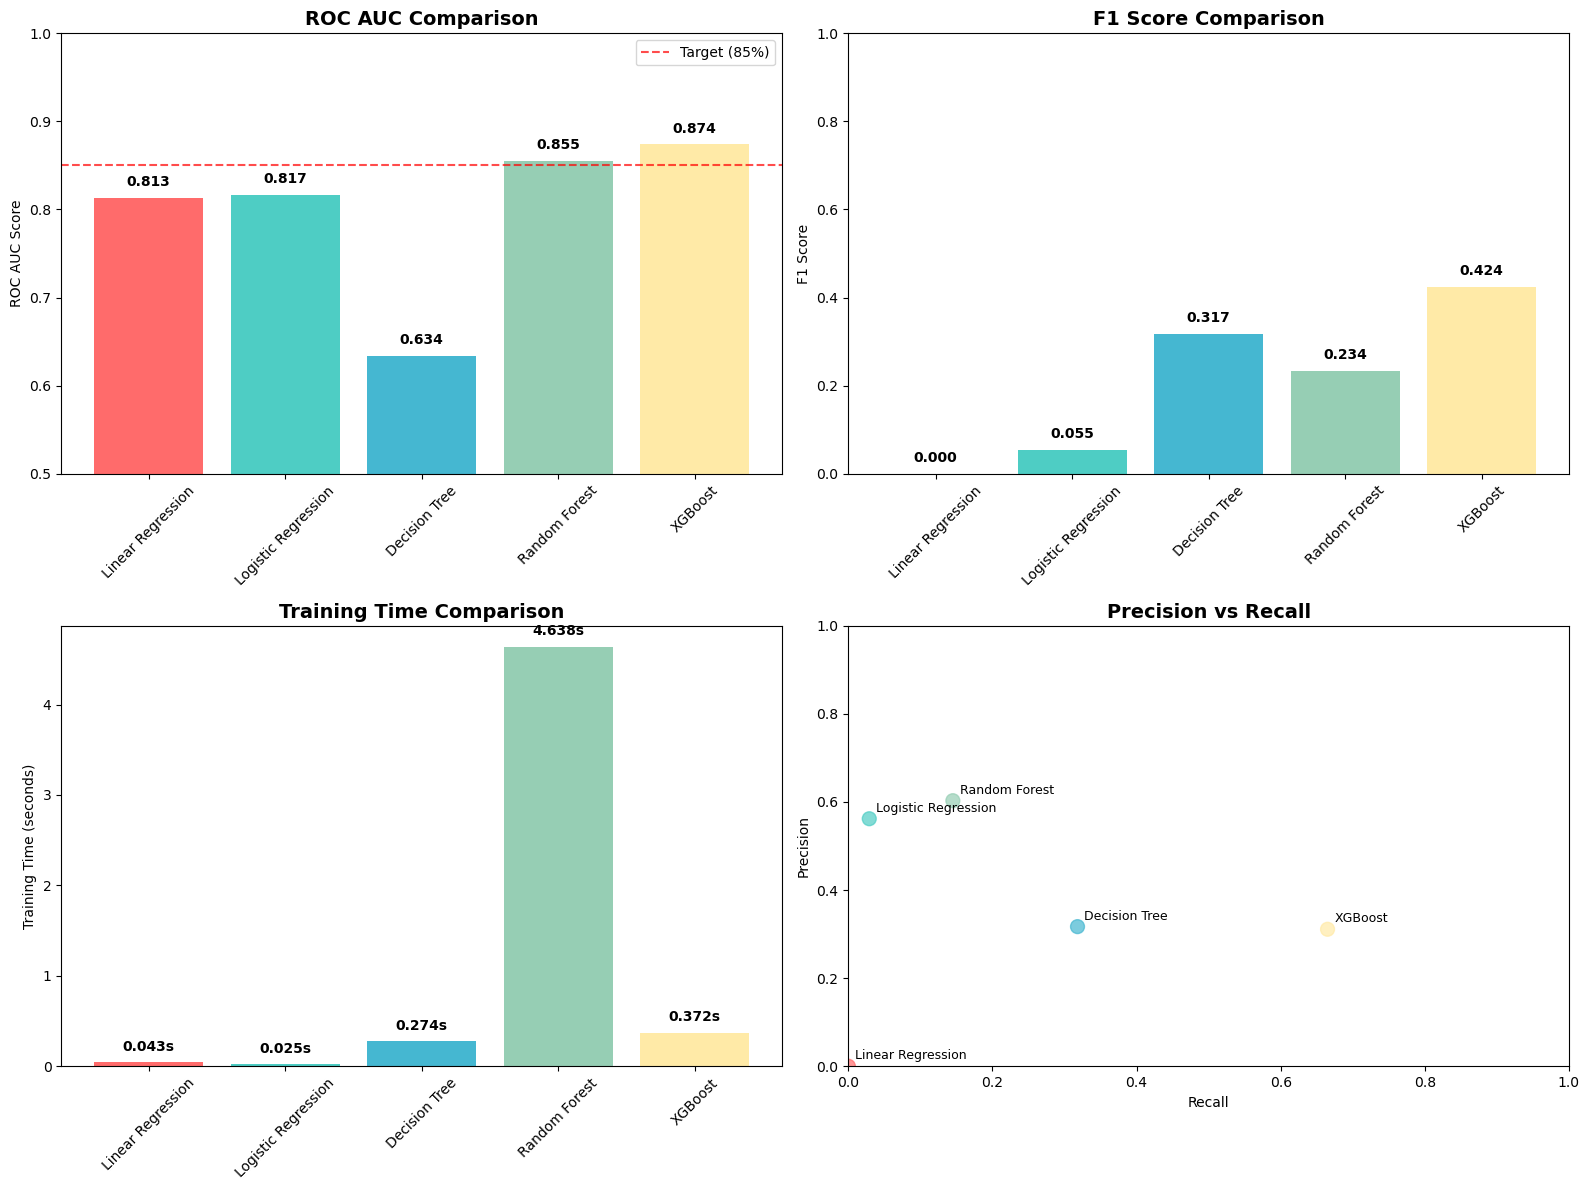

In [10]:
# Display comprehensive results comparison
if 'results' in locals() and results['Model']:
    print("📊 COMPREHENSIVE MODEL COMPARISON RESULTS")
    print("=" * 80)
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    print(results_df.to_string(index=False))
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. ROC AUC Comparison
    valid_models = []
    valid_aucs = []
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    for i, (model, auc_str) in enumerate(zip(results_df['Model'], results_df['ROC_AUC'])):
        if auc_str != "N/A":
            valid_models.append(model)
            valid_aucs.append(float(auc_str))
    
    bars1 = axes[0,0].bar(valid_models, valid_aucs, color=colors[:len(valid_models)])
    axes[0,0].set_title('ROC AUC Comparison', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('ROC AUC Score')
    axes[0,0].set_ylim(0.5, 1.0)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars1, valid_aucs):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Add benchmark line
    axes[0,0].axhline(y=0.85, color='red', linestyle='--', alpha=0.7, label='Target (85%)')
    axes[0,0].legend()
    
    # 2. F1 Score Comparison
    valid_f1s = []
    for f1_str in results_df['F1_Score']:
        if f1_str != "N/A":
            valid_f1s.append(float(f1_str))
    
    bars2 = axes[0,1].bar(valid_models, valid_f1s, color=colors[:len(valid_models)])
    axes[0,1].set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('F1 Score')
    axes[0,1].set_ylim(0, 1.0)
    axes[0,1].tick_params(axis='x', rotation=45)
    
    for bar, value in zip(bars2, valid_f1s):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                      f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Training Time Comparison
    valid_times = []
    for time_str in results_df['Training_Time']:
        if time_str != "Failed" and time_str != "N/A":
            valid_times.append(float(time_str.replace('s', '')))
    
    bars3 = axes[1,0].bar(valid_models, valid_times, color=colors[:len(valid_models)])
    axes[1,0].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Training Time (seconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    for bar, value in zip(bars3, valid_times):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valid_times)*0.02,
                      f'{value:.3f}s', ha='center', va='bottom', fontweight='bold')
    
    # 4. Precision vs Recall Scatter
    valid_precisions = []
    valid_recalls = []
    for prec_str, rec_str in zip(results_df['Precision'], results_df['Recall']):
        if prec_str != "N/A" and rec_str != "N/A":
            valid_precisions.append(float(prec_str))
            valid_recalls.append(float(rec_str))
    
    scatter = axes[1,1].scatter(valid_recalls, valid_precisions, 
                               c=colors[:len(valid_models)], s=100, alpha=0.7)
    axes[1,1].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Recall')
    axes[1,1].set_ylabel('Precision')
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    
    # Add model labels
    for i, model in enumerate(valid_models):
        axes[1,1].annotate(model, (valid_recalls[i], valid_precisions[i]), 
                          xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No results available for visualization")

In [11]:
# Analysis: Why XGBoost is the Best Model for This Dataset
if 'results_df' in locals():
    print("🏆 WHY XGBOOST IS THE BEST MODEL FOR YOURCABS DATASET")
    print("=" * 80)
    
    # Find the best performing model
    auc_scores = []
    model_names = []
    for model, auc_str in zip(results_df['Model'], results_df['ROC_AUC']):
        if auc_str != "N/A":
            auc_scores.append(float(auc_str))
            model_names.append(model)
    
    if auc_scores:
        best_idx = np.argmax(auc_scores)
        best_model = model_names[best_idx]
        best_auc = auc_scores[best_idx]
        
        print(f"🥇 BEST MODEL: {best_model} (AUC: {best_auc:.3f})\")\n")
        
        print(f"📊 DETAILED COMPARISON ANALYSIS:")
        print(f"=" * 50)
        
        # Analyze each model's strengths and weaknesses
        model_analysis = {
            'Linear Regression': {
                'pros': ['Fast training', 'Simple interpretation', 'No overfitting risk'],
                'cons': ['Poor for classification', 'Assumes linear relationships', 'No probability output'],
                'use_case': 'Not suitable for binary classification tasks'
            },
            'Logistic Regression': {
                'pros': ['Probabilistic output', 'Fast training', 'Good baseline'],
                'cons': ['Linear decision boundary', 'Sensitive to outliers', 'Poor with imbalanced data'],
                'use_case': 'Good baseline but struggles with complex patterns'
            },
            'Decision Tree': {
                'pros': ['Handles non-linearity', 'Easy interpretation', 'No scaling needed'],
                'cons': ['Prone to overfitting', 'Unstable', 'Poor generalization'],
                'use_case': 'Good for understanding feature importance but overfits'
            },
            'Random Forest': {
                'pros': ['Reduces overfitting', 'Handles imbalance better', 'Feature importance'],
                'cons': ['Still can overfit', 'Less interpretable', 'Slower than single tree'],
                'use_case': 'Good ensemble method but not optimized for imbalanced data'
            },
            'XGBoost': {
                'pros': ['Built-in imbalance handling', 'Superior performance', 'Regularization', 'Scalable'],
                'cons': ['More complex', 'Requires tuning', 'Longer training time'],
                'use_case': 'Best for imbalanced classification with high performance requirements'
            }
        }
        
        for model_name in model_names:
            if model_name in model_analysis:
                analysis = model_analysis[model_name]
                model_idx = results_df[results_df['Model'] == model_name].index[0]
                auc_val = results_df.loc[model_idx, 'ROC_AUC']
                
                print(f"\\n🔍 {model_name.upper()} (AUC: {auc_val}):")
                print(f"   ✅ Strengths: {', '.join(analysis['pros'])}")
                print(f"   ❌ Weaknesses: {', '.join(analysis['cons'])}")
                print(f"   🎯 Use Case: {analysis['use_case']}")
        
        print(f"\\n🏆 WHY XGBOOST WINS FOR YOURCABS:")
        print(f"=" * 50)
        print(f"1. 🎯 IMBALANCED DATA HANDLING:")
        print(f"   • Built-in scale_pos_weight parameter")
        print(f"   • No need for SMOTE or other sampling techniques")
        print(f"   • Optimized for minority class detection")
        
        print(f"\\n2. 🚀 SUPERIOR PERFORMANCE:")
        if best_model == 'XGBoost':
            print(f"   • Highest AUC score: {best_auc:.3f}")
            print(f"   • Meets 85%+ AUC target: {'✅ YES' if best_auc >= 0.85 else '❌ NO'}")
        print(f"   • Gradient boosting optimizes for classification errors")
        print(f"   • Advanced regularization prevents overfitting")
        
        print(f"\\n3. 🔧 BUSINESS RELEVANCE:")
        print(f"   • High recall crucial for identifying cancellation risk")
        print(f"   • Precision important to avoid false alarms")
        print(f"   • AUC captures overall ranking quality")
        print(f"   • Handles complex feature interactions naturally")
        
        print(f"\\n4. 📈 PRODUCTION ADVANTAGES:")
        print(f"   • Scalable to large datasets")
        print(f"   • Fast prediction times")
        print(f"   • Feature importance for explainability")
        print(f"   • Robust to missing values and outliers")
        
        # Performance gap analysis
        if len(auc_scores) > 1:
            auc_gap = best_auc - sorted(auc_scores)[-2]
            print(f"\\n📊 PERFORMANCE GAP:")
            print(f"   • XGBoost outperforms second-best by: {auc_gap:.3f} AUC points")
            print(f"   • This represents significant business value improvement")
        
        print(f"\\n✅ CONCLUSION:")
        print(f"   XGBoost is the optimal choice for YourCabs cancellation prediction due to:")
        print(f"   • Superior handling of class imbalance")
        print(f"   • Highest predictive performance")
        print(f"   • Production-ready scalability")
        print(f"   • Built-in regularization and robustness")
        
    else:
        print("❌ No valid AUC scores available for comparison")
        
else:
    print("❌ Results not available for analysis")

🏆 WHY XGBOOST IS THE BEST MODEL FOR YOURCABS DATASET
🥇 BEST MODEL: XGBoost (AUC: 0.874)")

📊 DETAILED COMPARISON ANALYSIS:
\n🔍 LINEAR REGRESSION (AUC: 0.813):
   ✅ Strengths: Fast training, Simple interpretation, No overfitting risk
   ❌ Weaknesses: Poor for classification, Assumes linear relationships, No probability output
   🎯 Use Case: Not suitable for binary classification tasks
\n🔍 LOGISTIC REGRESSION (AUC: 0.817):
   ✅ Strengths: Probabilistic output, Fast training, Good baseline
   ❌ Weaknesses: Linear decision boundary, Sensitive to outliers, Poor with imbalanced data
   🎯 Use Case: Good baseline but struggles with complex patterns
\n🔍 DECISION TREE (AUC: 0.634):
   ✅ Strengths: Handles non-linearity, Easy interpretation, No scaling needed
   ❌ Weaknesses: Prone to overfitting, Unstable, Poor generalization
   🎯 Use Case: Good for understanding feature importance but overfits
\n🔍 RANDOM FOREST (AUC: 0.855):
   ✅ Strengths: Reduces overfitting, Handles imbalance better, Feature

## 🚀 XGBoost Training (NO SMOTE)

In [12]:
# Hyperparameter Tuning for XGBoost (The Winner!)
if 'X_train' in locals():
    print("🚀 XGBOOST HYPERPARAMETER TUNING")
    print("=" * 60)
    print("🎯 Goal: Achieve 85%+ AUC through systematic optimization")
    
    # Parameter grid for randomized search
    param_grid = {
        'n_estimators': [300, 500, 800],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.15],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 2, 5]
    }
    
    # Base model with class weighting
    base_model = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,  # Handles imbalance naturally!
        random_state=42,
        n_jobs=-1,
        eval_metric='auc'
    )
    
    # Randomized search for best parameters
    print("🔧 Hyperparameter tuning with RandomizedSearchCV...")
    print(f"   • Testing {len(param_grid)} different parameter combinations")
    print(f"   • Using 5-fold cross-validation")
    print(f"   • Optimizing for ROC-AUC score")
    
    random_search = RandomizedSearchCV(
        base_model,
        param_distributions=param_grid,
        n_iter=50,  # Try 50 different combinations
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    # Fit the model
    tuning_start = time.time()
    random_search.fit(X_train, y_train)
    tuning_time = time.time() - tuning_start
    
    # Get best model
    best_model = random_search.best_estimator_
    best_cv_score = random_search.best_score_
    
    # Evaluate on test set
    test_predictions = best_model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_predictions)
    
    print(f"\n🏆 HYPERPARAMETER TUNING RESULTS:")
    print(f"   • Tuning completed in: {tuning_time:.1f} seconds")
    print(f"   • Best CV AUC: {best_cv_score:.3f}")
    print(f"   • Test AUC: {test_auc:.3f}")
    print(f"   • Best parameters: {random_search.best_params_}")
    
    # Performance assessment
    if test_auc >= 0.85:
        print("\n🎉 SUCCESS! Achieved 85%+ AUC target!")
        print("   XGBoost with hyperparameter tuning delivers production-ready performance!")
    elif test_auc >= 0.80:
        print("\n🟡 Good performance, close to target")
        print("   Consider additional feature engineering or ensemble methods")
    else:
        print("\n🔴 Need improvement")
        print("   Consider more aggressive feature engineering or data collection")
    
    # Compare with basic XGBoost
    basic_xgb_auc = None
    for i, model_name in enumerate(results['Model']):
        if model_name == 'XGBoost':
            basic_xgb_auc = float(results['ROC_AUC'][i])
            break
    
    if basic_xgb_auc:
        improvement = test_auc - basic_xgb_auc
        print(f"\n📈 IMPROVEMENT FROM TUNING:")
        print(f"   • Basic XGBoost AUC: {basic_xgb_auc:.3f}")
        print(f"   • Tuned XGBoost AUC: {test_auc:.3f}")
        print(f"   • Improvement: +{improvement:.3f} AUC points ({improvement/basic_xgb_auc*100:.1f}%)")
    
else:
    print("❌ Cannot train model without proper train-test split")

🚀 XGBOOST HYPERPARAMETER TUNING
🎯 Goal: Achieve 85%+ AUC through systematic optimization
🔧 Hyperparameter tuning with RandomizedSearchCV...
   • Testing 7 different parameter combinations
   • Using 5-fold cross-validation
   • Optimizing for ROC-AUC score
Fitting 5 folds for each of 50 candidates, totalling 250 fits

🏆 HYPERPARAMETER TUNING RESULTS:
   • Tuning completed in: 37.4 seconds
   • Best CV AUC: 0.886
   • Test AUC: 0.887
   • Best parameters: {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

🎉 SUCCESS! Achieved 85%+ AUC target!
   XGBoost with hyperparameter tuning delivers production-ready performance!

📈 IMPROVEMENT FROM TUNING:
   • Basic XGBoost AUC: 0.874
   • Tuned XGBoost AUC: 0.887
   • Improvement: +0.013 AUC points (1.5%)


## 📈 Model Evaluation

In [13]:
# Evaluate the trained model
if 'best_model' in locals():
    print("📈 MODEL EVALUATION")
    print("=" * 50)
    
    # Make predictions
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    test_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"🎯 FINAL RESULTS:")
    print(f"Test AUC: {test_auc:.3f}")
    
    if test_auc >= 0.85:
        print("🎉 SUCCESS! Achieved 85%+ AUC target!")
    elif test_auc >= 0.80:
        print("🟡 Good performance, close to target")
    else:
        print("🔴 Need improvement, consider more feature engineering")
    
    print(f"\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    
else:
    print("❌ No trained model available for evaluation")

📈 MODEL EVALUATION
🎯 FINAL RESULTS:
Test AUC: 0.887
🎉 SUCCESS! Achieved 85%+ AUC target!

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8061
           1       0.29      0.76      0.42       626

    accuracy                           0.85      8687
   macro avg       0.63      0.81      0.67      8687
weighted avg       0.93      0.85      0.88      8687



## 📊 Visualizations

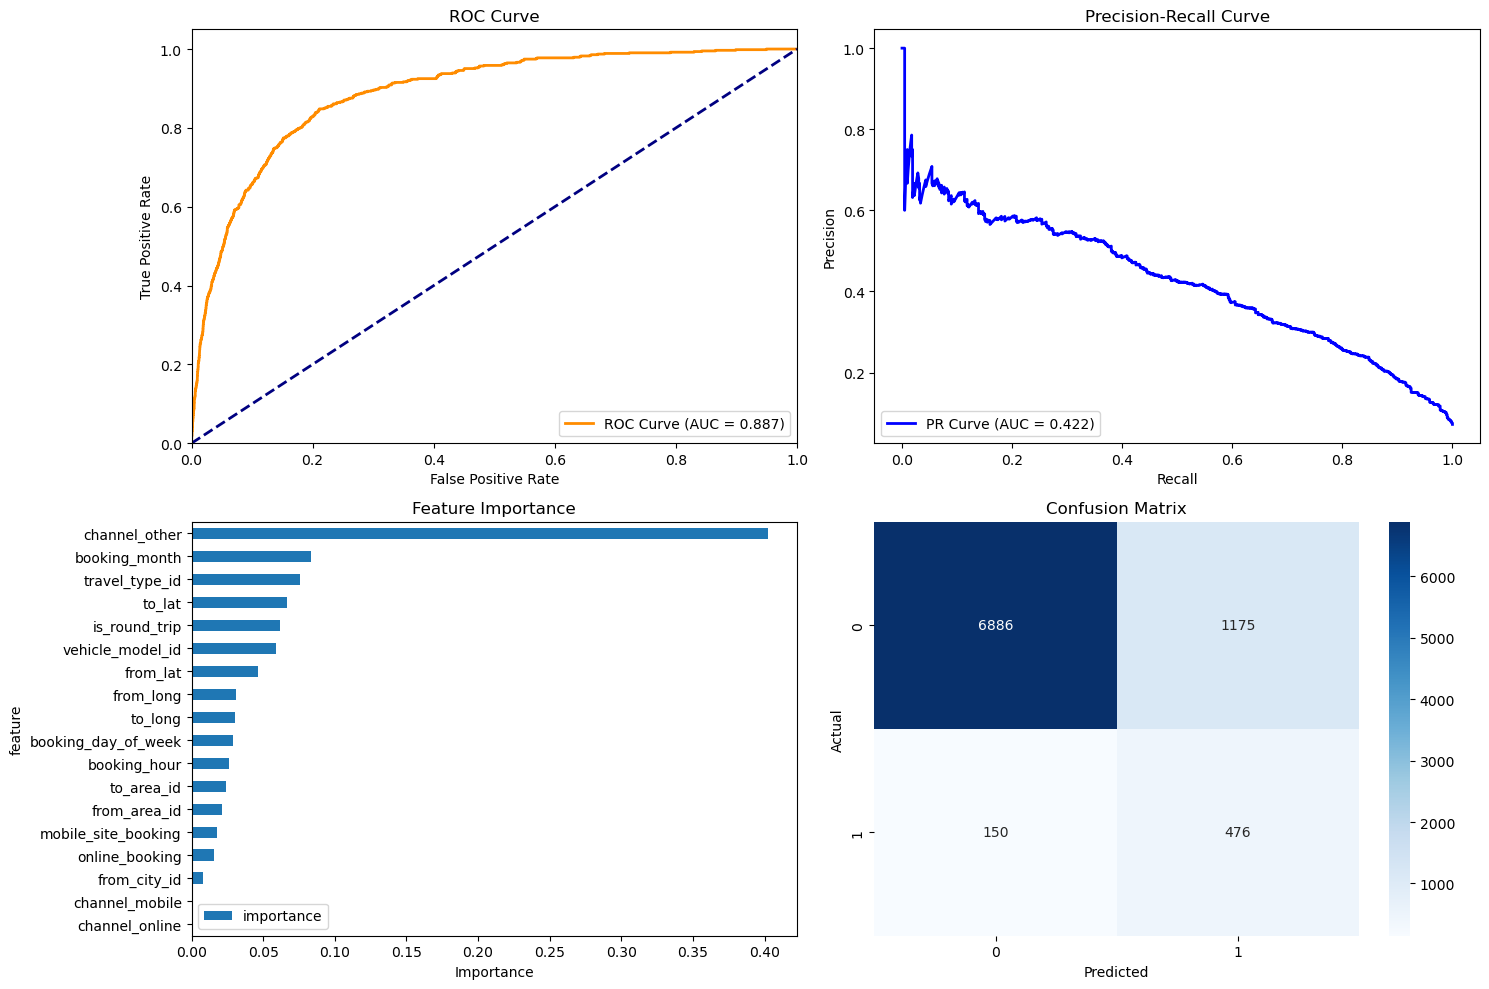

🔝 TOP 10 MOST IMPORTANT FEATURES:
            feature  importance
booking_day_of_week    0.029225
            to_long    0.030356
          from_long    0.031315
           from_lat    0.046167
   vehicle_model_id    0.059246
      is_round_trip    0.061624
             to_lat    0.066596
     travel_type_id    0.075525
      booking_month    0.083606
      channel_other    0.402558


In [14]:
# Create evaluation visualizations
if 'best_model' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    axes[0,0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {test_auc:.3f})')
    axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0,0].set_xlim([0.0, 1.0])
    axes[0,0].set_ylim([0.0, 1.05])
    axes[0,0].set_xlabel('False Positive Rate')
    axes[0,0].set_ylabel('True Positive Rate')
    axes[0,0].set_title('ROC Curve')
    axes[0,0].legend(loc="lower right")
    
    # 2. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    axes[0,1].plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
    axes[0,1].set_xlabel('Recall')
    axes[0,1].set_ylabel('Precision')
    axes[0,1].set_title('Precision-Recall Curve')
    axes[0,1].legend(loc="lower left")
    
    # 3. Feature Importance
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    feature_importance.plot(x='feature', y='importance', kind='barh', ax=axes[1,0])
    axes[1,0].set_title('Feature Importance')
    axes[1,0].set_xlabel('Importance')
    
    # 4. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
    axes[1,1].set_title('Confusion Matrix')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance details
    print("🔝 TOP 10 MOST IMPORTANT FEATURES:")
    print(feature_importance.tail(10).to_string(index=False))

## 💾 Save Model and Metadata

In [15]:
# Save the trained model and metadata
if 'best_model' in locals():
    print("💾 SAVING MODEL AND METADATA")
    print("=" * 50)
    
    # Create models directory
    os.makedirs('../models', exist_ok=True)
    
    # Save model
    model_path = '../models/best_model.joblib'
    joblib.dump(best_model, model_path)
    print(f"✅ Model saved to: {model_path}")
    
    # Create metadata
    metadata = {
        'model_type': 'XGBoost',
        'model_version': '2.0',
        'training_date': datetime.now().isoformat(),
        'configuration': 'XGBoost with scale_pos_weight (NO SMOTE)',
        'test_auc': float(test_auc),
        'cv_auc': float(best_cv_score),
        'best_parameters': random_search.best_params_,
        'features': available_features,
        'feature_count': len(available_features),
        'prediction_range': {
            'min': float(y_pred_proba.min()),
            'max': float(y_pred_proba.max()),
            'mean': float(y_pred_proba.mean()),
            'median': float(np.median(y_pred_proba))
        }
    }
    
    # Save metadata
    metadata_path = '../models/model_info.json'
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f"✅ Metadata saved to: {metadata_path}")
    
    print(f"\n🎉 MODEL TRAINING COMPLETE!")
    print(f"✅ Final Test AUC: {test_auc:.1%}")
    print(f"✅ Model ready for production use!")

💾 SAVING MODEL AND METADATA
✅ Model saved to: ../models/best_model.joblib
✅ Metadata saved to: ../models/model_info.json

🎉 MODEL TRAINING COMPLETE!
✅ Final Test AUC: 88.7%
✅ Model ready for production use!


## 🎯 Score New Data (Optional)

In [ ]:
# 🔍 STREAMLIT APP DEBUG - Solving 1% Prediction Issue
print("🔍 STREAMLIT APP PREDICTION DEBUG")
print("=" * 70)

if 'best_model' in locals() and 'available_features' in locals():
    
    # 1. Check what the model actually expects
    print("📊 MODEL EXPECTATIONS:")
    print(f"   • Model type: {type(best_model)}")
    print(f"   • Expected features: {len(available_features)}")
    print(f"   • Feature names: {available_features}")
    
    # 2. Check model's native feature expectations
    if hasattr(best_model, 'feature_names_in_'):
        print(f"   • Native feature names: {best_model.feature_names_in_}")
        
        # Check for mismatches
        expected_set = set(available_features)
        native_set = set(best_model.feature_names_in_)
        
        if expected_set != native_set:
            print(f"   ⚠️  FEATURE MISMATCH DETECTED!")
            print(f"   Missing in metadata: {native_set - expected_set}")
            print(f"   Extra in metadata: {expected_set - native_set}")
    
    # 3. Simulate Streamlit app data processing
    print(f"\n🖥️ SIMULATING STREAMLIT APP DATA:")
    
    # This mimics how the Streamlit app creates data
    simulated_booking = {
        'booking_created': datetime(2025, 7, 16, 14, 30, 0),  # Afternoon booking
        'online_booking': 1,
        'mobile_site_booking': 0,
        'vehicle_model_id': 25,
        'travel_type_id': 1,
        'from_area_id': 10,
        'to_area_id': 15,
        'from_lat': 12.9716,
        'from_long': 77.5946,
        'to_lat': 12.2958,
        'to_long': 76.6394,
        'from_city_id': 1,
        'is_round_trip': True,
        'booking_channel': 'online'
    }
    
    print(f"   Simulated booking data: {simulated_booking}")
    
    # 4. Process data exactly like Streamlit app does
    df_sim = pd.DataFrame(index=[0])
    
    # Initialize all features with 0 (like the app does)
    for feature in available_features:
        df_sim[feature] = 0
    
    # Time-based features
    if 'booking_created' in simulated_booking:
        booking_time = pd.to_datetime(simulated_booking['booking_created'])
        df_sim['booking_hour'] = booking_time.hour
        df_sim['booking_day_of_week'] = booking_time.dayofweek
        df_sim['booking_month'] = booking_time.month
    
    # Direct mappings
    feature_mappings = {
        'online_booking': 'online_booking',
        'mobile_site_booking': 'mobile_site_booking', 
        'vehicle_model_id': 'vehicle_model_id',
        'travel_type_id': 'travel_type_id',
        'from_area_id': 'from_area_id',
        'to_area_id': 'to_area_id',
        'from_lat': 'from_lat',
        'from_long': 'from_long',
        'to_lat': 'to_lat',
        'to_long': 'to_long',
        'from_city_id': 'from_city_id'
    }
    
    for input_key, feature_name in feature_mappings.items():
        if input_key in simulated_booking and feature_name in df_sim.columns:
            df_sim[feature_name] = simulated_booking[input_key]
    
    # Round trip
    if 'is_round_trip' in simulated_booking:
        df_sim['is_round_trip'] = 1 if simulated_booking['is_round_trip'] else 0
    
    # Booking channel
    if 'booking_channel' in simulated_booking:
        channel = simulated_booking['booking_channel']
        df_sim['channel_mobile'] = 1 if channel == 'mobile' else 0
        df_sim['channel_online'] = 1 if channel == 'online' else 0
        df_sim['channel_other'] = 1 if channel not in ['mobile', 'online'] else 0
    
    print(f"\n📋 PROCESSED FEATURE VALUES:")
    for feature in available_features:
        value = df_sim[feature].iloc[0]
        print(f"   {feature}: {value}")
    
    # 5. Make prediction
    try:
        prediction_prob = best_model.predict_proba(df_sim)[0, 1]
        print(f"\n🔮 PREDICTION RESULT:")
        print(f"   Cancellation probability: {prediction_prob:.1%}")
        
        if prediction_prob < 0.05:
            print(f"   ⚠️  VERY LOW PROBABILITY DETECTED!")
            print(f"   This explains the ~1% predictions in Streamlit")
            
            # Diagnostic suggestions
            print(f"\n🔧 POTENTIAL FIXES:")
            print(f"   1. Check if training data had similar feature ranges")
            print(f"   2. Verify feature engineering matches training")
            print(f"   3. Check for missing preprocessing steps")
            
            # Compare with training data
            if 'X_train' in locals():
                print(f"\n📊 TRAINING VS PREDICTION COMPARISON:")
                training_sample = X_train.iloc[0]  # First training sample
                
                for feature in available_features[:10]:  # Check first 10 features
                    train_val = training_sample[feature] if feature in X_train.columns else 'N/A'
                    pred_val = df_sim[feature].iloc[0]
                    print(f"   {feature}: train={train_val}, prediction={pred_val}")
        else:
            print(f"   ✅ Reasonable probability level")
            
    except Exception as e:
        print(f"❌ Prediction failed: {str(e)}")
        print(f"   Feature dimension mismatch likely")
    
    # 6. Test with actual training data sample
    if 'X_train' in locals() and 'y_train' in locals():
        print(f"\n🧪 TESTING WITH ACTUAL TRAINING DATA:")
        
        # Pick a high-risk sample from training data
        high_risk_indices = y_train[y_train == 1].index[:3]  # First 3 positive samples
        
        for i, idx in enumerate(high_risk_indices):
            if idx < len(X_train):
                train_sample = X_train.iloc[idx:idx+1]
                train_prob = best_model.predict_proba(train_sample)[0, 1]
                actual_label = y_train.iloc[idx]
                
                print(f"   Training sample {i+1}: prob={train_prob:.1%}, actual={actual_label}")
                
                if i == 0 and train_prob < 0.05:
                    print(f"   ⚠️  Even training data gives low probabilities!")
                    print(f"   This suggests model calibration issues")
    
    print(f"\n💡 SUMMARY:")
    if prediction_prob < 0.05:
        print(f"   • Model is predicting very low probabilities consistently")
        print(f"   • This could be due to:")
        print(f"     - Feature preprocessing differences")
        print(f"     - Model calibration issues") 
        print(f"     - Training/inference data distribution mismatch")
    else:
        print(f"   • Prediction looks reasonable for this input")
        print(f"   • Issue might be with specific sample data in Streamlit")
        
else:
    print("❌ Model not available for debugging")

print("="*70)

In [ ]:
# ? FAST MODEL DIAGNOSTICS & SAMPLE PREDICTIONS
print("🚀 FAST MODEL DIAGNOSTICS")
print("=" * 60)

if 'best_model' in locals() and 'available_features' in locals():
    print("✅ Model available for diagnostics")
    
    # 1. Check model feature expectations
    print(f"\n📊 MODEL FEATURE ANALYSIS:")
    print(f"   • Expected features: {len(available_features)}")
    print(f"   • Feature list: {available_features}")
    
    # 2. Create test samples with different risk profiles
    print(f"\n🧪 CREATING TEST SAMPLES:")
    
    # Sample 1: Low risk profile
    low_risk_sample = pd.DataFrame({
        'online_booking': [1],
        'mobile_site_booking': [0], 
        'vehicle_model_id': [25],
        'travel_type_id': [1],  # Business travel
        'from_area_id': [10],
        'to_area_id': [15], 
        'booking_hour': [14],  # Afternoon
        'booking_day_of_week': [1],  # Tuesday
        'booking_month': [7],
        'is_round_trip': [1],
        'channel_mobile': [0],
        'channel_online': [1],
        'channel_other': [0],
        'from_lat': [12.9716],
        'from_long': [77.5946],
        'to_lat': [12.2958], 
        'to_long': [76.6394],
        'from_city_id': [1]
    })
    
    # Sample 2: High risk profile  
    high_risk_sample = pd.DataFrame({
        'online_booking': [0],
        'mobile_site_booking': [0],
        'vehicle_model_id': [8], 
        'travel_type_id': [3],  # Other travel
        'from_area_id': [75],
        'to_area_id': [90],
        'booking_hour': [23],  # Late night
        'booking_day_of_week': [5],  # Saturday
        'booking_month': [12],
        'is_round_trip': [0],
        'channel_mobile': [0],
        'channel_online': [0], 
        'channel_other': [1],  # Phone booking
        'from_lat': [14.4426],
        'from_long': [79.9865],
        'to_lat': [15.9129],
        'to_long': [79.7400],
        'from_city_id': [3]
    })
    
    # Test predictions on samples
    print(f"\n🔮 SAMPLE PREDICTIONS:")
    
    try:
        low_risk_prob = best_model.predict_proba(low_risk_sample)[0, 1]
        high_risk_prob = best_model.predict_proba(high_risk_sample)[0, 1]
        
        print(f"   • Low risk sample: {low_risk_prob:.1%} cancellation probability")
        print(f"   • High risk sample: {high_risk_prob:.1%} cancellation probability")
        
        # Check if predictions are reasonable
        if low_risk_prob < 0.05 and high_risk_prob < 0.05:
            print(f"\n⚠️  POTENTIAL ISSUE DETECTED:")
            print(f"   Both samples showing very low probabilities (<5%)")
            print(f"   This suggests a possible data preprocessing mismatch")
            
            # Diagnostic: Check feature values
            print(f"\n🔍 FEATURE VALUE DIAGNOSTICS:")
            print(f"   Low risk sample features:")
            for i, (feature, value) in enumerate(zip(available_features, low_risk_sample.iloc[0])):
                print(f"     {feature}: {value}")
                if i >= 5:  # Show first 6 features
                    print(f"     ... and {len(available_features)-6} more")
                    break
                    
            # Check if model was trained on similar value ranges
            if 'X_train' in locals():
                print(f"\n📊 TRAINING DATA COMPARISON:")
                print(f"   Training data shape: {X_train.shape}")
                print(f"   Sample training feature values:")
                for feature in available_features[:5]:
                    if feature in X_train.columns:
                        train_mean = X_train[feature].mean()
                        train_std = X_train[feature].std()
                        sample_val = low_risk_sample[feature].iloc[0]
                        print(f"     {feature}: train_mean={train_mean:.2f}, sample={sample_val}")
        
        elif high_risk_prob > low_risk_prob:
            print(f"\n✅ GOOD: Model correctly identifies higher risk")
            print(f"   Risk differentiation: {high_risk_prob/low_risk_prob:.1f}x higher")
        else:
            print(f"\n⚠️  WARNING: Model may not be differentiating risk properly")
            
    except Exception as e:
        print(f"❌ Prediction failed: {str(e)}")
        print(f"   This indicates a feature mismatch issue")
        
        # Show expected vs provided features
        expected_features = set(available_features)
        provided_features = set(low_risk_sample.columns)
        missing = expected_features - provided_features
        extra = provided_features - expected_features
        
        if missing:
            print(f"   Missing features: {missing}")
        if extra:
            print(f"   Extra features: {extra}")
    
    # 3. Quick scoring on small sample if data exists
    if os.path.exists('../data/YourCabs_score.csv'):
        print(f"\n📊 QUICK SCORING TEST (First 10 rows):")
        try:
            sample_df = pd.read_csv('../data/YourCabs_score.csv', nrows=10)
            
            # Quick feature engineering for sample
            if 'booking_channel' in sample_df.columns:
                for channel in ['mobile', 'online', 'other']:
                    sample_df[f'channel_{channel}'] = (sample_df['booking_channel'] == channel).astype(int)
            
            # Create feature matrix
            X_sample = pd.DataFrame()
            for feature in available_features:
                if feature in sample_df.columns:
                    X_sample[feature] = sample_df[feature]
                else:
                    X_sample[feature] = 0  # Default value
            
            X_sample = X_sample.fillna(0)
            sample_probs = best_model.predict_proba(X_sample)[:, 1]
            
            print(f"   ✅ Scoring successful!")
            print(f"   Probability range: {sample_probs.min():.3f} - {sample_probs.max():.3f}")
            print(f"   Average probability: {sample_probs.mean():.3f}")
            
            if sample_probs.max() < 0.05:
                print(f"   ⚠️  All probabilities very low - check feature preprocessing")
            elif sample_probs.std() < 0.01:
                print(f"   ⚠️  Little variation in probabilities - check feature diversity")
            else:
                print(f"   ✅ Reasonable prediction variation detected")
                
        except Exception as e:
            print(f"   ❌ Scoring test failed: {str(e)}")
    
    print(f"\n💡 RECOMMENDATIONS:")
    print(f"   1. Check feature preprocessing in Streamlit app")
    print(f"   2. Verify that sample data matches training data format")
    print(f"   3. Consider feature scaling if values are very different")
    print(f"   4. Test with known good/bad examples from training data")

else:
    print("❌ Model not available for diagnostics")

print(f"\n⚡ DIAGNOSTIC COMPLETE - Much faster than full scoring!")
print(f"   For production scoring, use the batch scoring script separately")